In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("final_data_train.csv")
data=train.copy()
# train.info()

In [4]:
labels = []

In [103]:
# pd.set_option('display.max_columns', None)
# data.iloc[:5,:]
data.describe()

,dropout,nCourses,nEnrollments,avg_delay_chapters_course,lifetime,btw_course_gap_min,btw_course_gap_max,btw_course_gap_mean,access,discussion,navigate,page_close,problem,video,wiki,problem_duration,video_duration,discussion_duration,md_interarrival_time,mean_interarrival_time,problem_duration_per_course,video_duration_per_course,discussion_duration_per_course
count,72395.000000,72395.000000,72395.000000,7.239500e+04,72395.000000,72395.000000,72395.000000,72395.000000,72395.000000,72395.000000,72395.000000,72395.000000,72395.000000,72395.000000,72395.000000,72395.000000,72395.000000,7.239500e+04,72395.000000,72395.000000,72395.000000,72395.00000,7.239500e+04
mean,0.792403,1.877353,3395.576697,1.806995e+05,35.806506,591.387389,605.521182,596.525763,25.726901,5.261151,8.372512,10.260018,10.668016,6.648291,0.738048,795.447034,1443.089910,1.930331e+03,47.176269,8692.418258,535.159108,1084.93008,1.417819e+03
std,0.405590,1.540011,2241.720083,3.349091e+05,59.655252,483.475053,468.072365,477.511261,52.444235,30.659523,12.971313,20.588366,35.261382,14.757497,3.472259,4268.854746,7665.628551,3.917719e+04,2531.636986,25666.853592,2966.409454,6033.20715,3.277623e+04
min,0.000000,1.000000,385.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000e+00
25%,1.000000,1.000000,1306.000000,0.000000e+00,4.000000,7.000000,17.000000,15.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,11.271284,0.000000,0.00000,0.000000e+00
50%,1.000000,1.000000,2808.000000,7.777778e+00,15.000000,999.000000,999.000000,999.000000,6.000000,0.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,3.500000,181.928571,0.000000,0.00000,0.000000e+00
75%,1.000000,2.000000,5636.000000,2.144375e+02,29.000000,999.000000,999.000000,999.000000,26.000000,2.000000,10.000000,10.000000,6.000000,6.000000,1.000000,207.000000,14.000000,2.700000e+01,7.000000,7847.021302,135.291667,10.00000,1.800000e+01
max,1.000000,18.000000,7310.000000,1.086171e+06,275.000000,999.000000,999.000000,999.000000,2163.000000,4360.000000,649.000000,389.000000,1046.000000,399.000000,338.000000,420445.000000,327914.000000,2.495175e+06,289203.000000,793253.333333,258808.000000,232236.00000,2.495175e+06


In [211]:
data.dtypes[-1] == 'category'

True

In [5]:
data.drop(['enrollment_id'], axis=1, inplace=True)

In [6]:
data.drop(['username'], axis=1, inplace=True)

In [7]:
data.drop(['avg_delay_chapters'], axis=1, inplace=True)

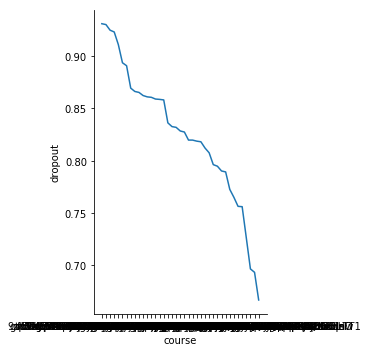

In [8]:
b = pd.DataFrame(data[['course_id', 'dropout']].groupby(['course_id']).mean().sort_values(by='dropout',ascending=False))
b['course'] = b.index
sns.relplot(x='course', y='dropout', data=b,kind='line',sort=False)

In [9]:
labels.append('course_id')

In [12]:
data.drop(['from', 'to'], axis=1, inplace=True)

In [14]:
b = pd.DataFrame(data[['nCourses', 'dropout']].groupby(['nCourses']).mean().sort_values(by='dropout',ascending=False))
b['nCourses'] = b.index
# sns.relplot(x='nCourses', y='dropout', data=b,kind='line', )

In [15]:
labels.append('nCourses')

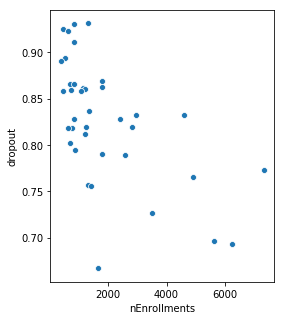

In [19]:
b = pd.DataFrame(data[['nEnrollments', 'dropout']].groupby(['nEnrollments']).mean().sort_values(by='dropout',ascending=False))
b['nEnrollments'] = b.index
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(4,5))
sns.relplot(x='nEnrollments', y='dropout', data=b,ax=ax )
plt.close(2)

In [20]:
labels.append('nEnrollments')

In [23]:
b = pd.DataFrame(data[['avg_delay_chapters_course', 'dropout']].groupby(['avg_delay_chapters_course']).mean().sort_values(by='dropout',ascending=False))
b['avg_delay_chapters_course'] = b.index
# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(4,5))
# sns.relplot(x='avg_delay_chapters_course', y='dropout', data=b,ax=ax )
# plt.close(2)

In [30]:
b = pd.DataFrame(data[['lifetime', 'dropout']].groupby(['lifetime']).mean().sort_values(by='dropout',ascending=False))
b['lifetime'] = b.index
# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(20,9))
# sns.relplot(x='lifetime', y='dropout', data=b,ax=ax )
# plt.close(2)

In [26]:
data['lifetime_group'] = pd.cut(data['lifetime'], [-1, 52, 110, 190,280 ])

In [31]:
b = pd.DataFrame(data[['lifetime_group', 'dropout']].groupby(['lifetime_group']).mean().sort_values(by='dropout',ascending=False))
b['lifetime_group'] = b.index
# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(20,9))
# sns.catplot(x='lifetime_group', hue='dropout', data=data,ax=ax, kind='count' )
# plt.close(2)
# b

In [32]:
labels.append('lifetime_group')

In [33]:
data.drop(['lifetime'], axis=1, inplace=True)

In [35]:
# b = pd.DataFrame(data[['btw_course_gap_mean', 'dropout']].groupby(['btw_course_gap_mean']).mean().sort_values(by='dropout',ascending=False))
# b['btw_course_gap_mean'] = b.index
# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,9))
# sns.relplot(x='btw_course_gap_mean', y='dropout',  data=b,ax=ax, )
# plt.close(2)
# b

In [37]:
# b = pd.DataFrame(data[['access', 'dropout']].groupby(['access']).mean().sort_values(by='dropout',ascending=False))
# b['access'] = b.index
# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(20,9))
# plt.xticks(np.arange(min(b['access']), max(b['access'])+1,100))
# sns.relplot(x='access', y='dropout',  data=b,ax=ax )

# plt.close(2)

In [38]:
data['access_group'] = pd.cut(data['access'], [-1,100,200,300,400,500,2200])

In [42]:
b = pd.DataFrame(data[['access_group', 'dropout']].groupby(['access_group']).mean().sort_values(by='dropout',ascending=False))
b['access'] = b.index
# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(20,9))
# # plt.xticks(np.arange(min(b['access']), max(b['access'])+1,100))
# plt.bar(list(b['access'].astype('str')),list(b['dropout']))


In [43]:
labels.append('access_group')

In [44]:
data.drop(['access'], axis=1, inplace=True)

In [45]:
corr = data.corr()

In [62]:
corr['dropout']

dropout                           1.000000
nCourses                         -0.098793
nEnrollments                     -0.101583
avg_delay_chapters_course        -0.011411
btw_course_gap_min                0.088720
btw_course_gap_max                0.083841
btw_course_gap_mean               0.087202
discussion                       -0.202237
navigate                         -0.458621
page_close                       -0.492389
problem                          -0.329692
video                            -0.422809
wiki                             -0.165261
problem_duration                 -0.236480
video_duration                   -0.182442
discussion_duration              -0.058032
md_interarrival_time             -0.002089
mean_interarrival_time           -0.056995
problem_duration_per_course      -0.219177
video_duration_per_course        -0.158982
discussion_duration_per_course   -0.050504
Name: dropout, dtype: float64

In [47]:
labels.append('btw_course_gap_mean')

In [49]:
b = pd.DataFrame(data[['discussion', 'dropout']].groupby(['discussion']).mean().sort_values(by='dropout',ascending=False))
b['discussion'] = b.index
# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,9))
# sns.relplot(x='discussion', y='dropout',  data=b,ax=ax, )
# plt.close(2)

In [50]:
labels.append('discussion')

In [52]:
# b = pd.DataFrame(data[['navigate', 'dropout']].groupby(['navigate']).mean().sort_values(by='dropout',ascending=False))
# b['discussion'] = b.index
# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,9))
# sns.relplot(x='discussion', y='dropout',  data=b,ax=ax, )
# plt.close(2)

In [54]:
# b = pd.DataFrame(data[['page_close', 'dropout']].groupby(['page_close']).mean().sort_values(by='dropout',ascending=False))
# b['discussion'] = b.index
# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,9))
# sns.relplot(x='discussion', y='dropout',  data=b,ax=ax, )
# plt.close(2)

In [55]:
labels.append('navigate')

In [56]:
labels.append('page_close')

In [57]:
labels = labels + ['problem', 'video', 'wiki']

In [64]:
labels = labels + ['problem_duration', 'video_duration', 'problem_duration_per_course', 'video_duration_per_course']

In [65]:
labels

['course_id',
 'nCourses',
 'nEnrollments',
 'lifetime_group',
 'access_group',
 'btw_course_gap_mean',
 'discussion',
 'navigate',
 'page_close',
 'problem',
 'video',
 'wiki',
 'problem_duration',
 'video_duration',
 'problem_duration_per_course',
 'video_duration_per_course ',
 'problem_duration',
 'video_duration',
 'problem_duration_per_course',
 'video_duration_per_course']

In [69]:
sets = data[labels].copy()

In [70]:
sets['dropout'] = data['dropout'].copy()